# **Logistic Regression**

### **Objectives**

*   Understand the basic concepts of logistic regression.
*   Differentiate between linear regression and logistic regression.
*   Learn about the logistic function (sigmoid function) and its role in logistic regression.

This Lab is prepared by **Parthasarthy** : 1211304155@student.mmu.edu.my

# **What is Logistic Regression?**

*   Supervised learning for binary classification **(Yes/No, True/False)**.
*   Estimates the probability of belonging to a class using the sigmoid function **(logit function)**.
*   Interpretable and widely used across various domains.

# **Types of Logistic Regression**



**1.   Binary logistic regression**
*   Predicts yes/no outcomes (e.g., churn, disease, loan repayment).
*   Ideal for two clear choices.

**2.   Multinomial logistic regression**
*   Predicts multiple categories (e.g., product type, rating, political party).
*   Useful for three or more distinct options.

**3.   Ordinal logistic regression**
*   Predicts ordered outcomes (e.g., satisfaction level, disease severity, cancer stage).
*   Applies to ranked data with natural order.




# **What's the difference between Logistic Regression and Linear Regression?**

### **1. Dependent Variable:**

  *   **Logistic Regression:** Used for binary dependent variables (e.g., yes/no, true/false).
  *   **Linear Regression:** Used for continuous dependent variables (e.g., height, temperature).

### **2. Outlier Sensitivity:**

  *   **Logistic Regression:** Less sensitive to outliers due to S-shaped curve.
  *   **Linear Regression:** Sensitive to outliers, can shift best fit line significantly.

### **3. Predicted Value Range:**

  *   **Logistic Regression:** Always outputs values between 0 and 1 (probabilities).
  *   **Linear Regression:** Can output values outside the desired range (e.g., negative probabilities).

Importing the libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer, load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

Visualizing difference between Linear and Logistic Regression

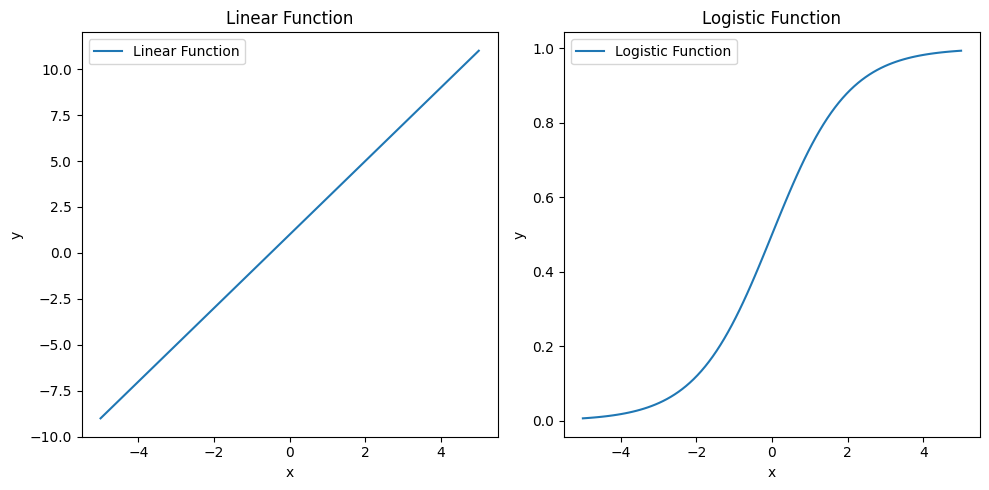

In [11]:
# Linear function: y = mx + b
def linear_function(x, m=2, b=1):
    return m * x + b

# Logistic function: y = 1 / (1 + e^(-z))
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x_values = np.linspace(-5, 5, 100)

# Calculate y values for both linear and logistic functions
linear_values = linear_function(x_values)
logistic_values = logistic_function(x_values)

# Plot the functions
plt.figure(figsize=(10, 5))

# Plot Linear Function
plt.subplot(1, 2, 1)
plt.plot(x_values, linear_values, label='Linear Function')
plt.title('Linear Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot Logistic Function
plt.subplot(1, 2, 2)
plt.plot(x_values, logistic_values, label='Logistic Function')
plt.title('Logistic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


# **Logistic Function**

Logistic regression aims to predict probabilities between 0 and 1, unlike linear regression which outputs any real number. The logistic function transforms the linear model's output into this desired range.

### **Logistic Function Formula:**

$$f(z) = \frac{1}{1+\frac{1}{e^z}} = \frac{1}{1+e^{-z}}$$

### **Properties:**



*  **Sigmoid shape:** The function resembles an S-shaped curve, asymptotically approaching 0 as z goes to negative infinity and 1 as z goes to positive infinity.
*   **Range:** The output values always lie between 0 and 1, regardless of the input.
*   **Monotonic:** The function increases steadily as z increases.


### **Steps involved in Logistic Function**


*  **Linear Combination:** The model calculates a weighted sum of features (e.g., w1*x1 + w2*x2 + ...), resulting in a score z.

*   **Odds Transformation:** We convert the score z into odds, representing the ratio of success probability to failure probability. However, odds can be positive or negative.

*   **Log of Odds:** To obtain an unrestricted range, we take the logarithm of odds, shifting the range to negative and positive infinity.

*   **Probability Transformation:** Finally, we transform the log of odds back to a probability between 0 and 1 using the exponential function and normalization.





## **Trying out the Logistic Function using the wine dataset**

Load the Iris Datastet

In [12]:
wine = load_wine()

Plot the logistic fucntion using the first two features

Input (z): [[ 2.62539781 -2.56295563 -0.06244218]
 [ 0.43104823 -0.19982564 -0.23122259]
 [ 0.11314371 -0.31083179  0.19768808]
 [ 2.82308613 -2.97180323  0.14871709]
 [ 0.18868018 -0.57707635  0.38839617]]
Probability: [[0.93247836 0.07156092 0.48439453]
 [0.60612395 0.45020916 0.44245053]
 [0.52825579 0.42291172 0.54926169]
 [0.94391068 0.04871609 0.5371109 ]
 [0.5470306  0.3596056  0.59589655]]


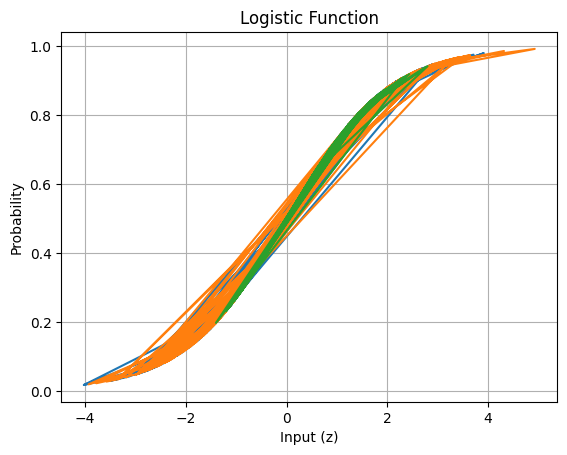

In [13]:
X = wine.data[:, :2]
y = wine.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Defining the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Create and train a Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_scaled, y)

# Calculate predicted probabilities for data points
z_values = model.decision_function(X_scaled)
probabilities = sigmoid(z_values)

print("Input (z):", z_values[:5])
print("Probability:", probabilities[:5])

# Visualize the sigmoid function (optional)
import matplotlib.pyplot as plt
plt.plot(z_values, probabilities)
plt.xlabel("Input (z)")
plt.ylabel("Probability")
plt.title("Logistic Function")
plt.grid(True)
plt.show()

# **The Log-Odds (Logit) Function, Logistic Regression Function & Decision Boundary**

### **1. Log-Odds (Logit) Function:**

The Log-Odds function, also known as the logit function, is a mathematical transformation used in Logistic Regression. It converts the probability of an event (p) into a continuous value called the log-odds (logit):

$$ \text{logit}(p) = log \left( \frac{p}{1 - p} \right) $$

This transformation helps represent probabilities on a continuous scale, making them easier to model linearly using Logistic Regression.

### **2. Logistic Regression Function:**

Logistic Regression is a statistical model used for binary classification problems. It predicts the probability of an event belonging to one of two classes based on a linear combination of its features. The Logistic Regression function takes the form:

$$ p(y = 1 | x) = p = \frac{1}{1+e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n)}} $$


where:

*   y : The target variable (0 or 1)
*   x : The input features
*   θ₀ : The intercept term
*   θᵢ : The coefficients for each feature
*   exp : The exponential function

The function outputs a probability between 0 and 1, representing the model's prediction for the class label.

### **3. Decision Boundary:**

The decision boundary in Logistic Regression separates the data points belonging to different classes. It's a line (for 2D data) or hyperplane (for higher dimensions) that defines the region where the model predicts one class over the other.





## **Visualisation of Log-Odds (Logit) Function, Logistic Regression Function & Decision Boundary using the wine dataset**

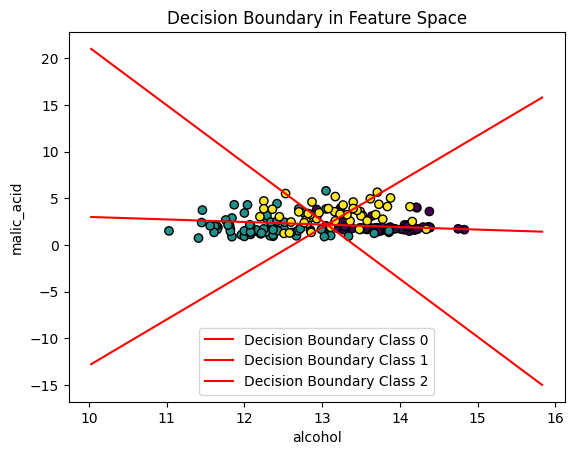

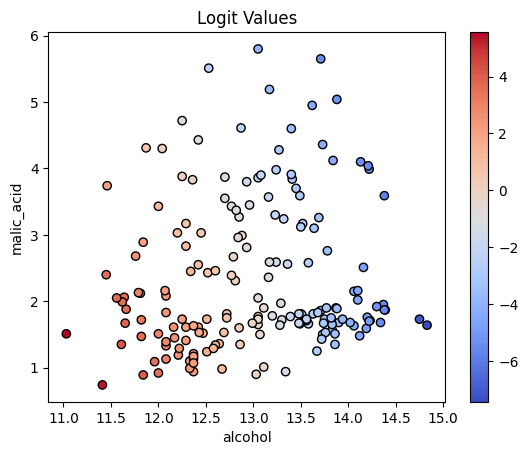

In [14]:
# Train a Logistic Regression model
model = LogisticRegression(solver="lbfgs", multi_class="auto")
model.fit(X, y)

# Define the logit function
def logit(p):
    return np.log(p / (1 - p))

# Calculate logit values for each data point
logit_values = logit(model.predict_proba(X)[:, 1])

# Define a function to plot the decision boundary
def plot_decision_boundary(X, model, title=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolors="k")

    # Plot decision boundaries for each class
    for i in range(len(model.classes_)):
        # Get the separating hyperplane equation from model coefficients
        w = model.coef_[i]
        b = model.intercept_[i]

        # Calculate decision boundary coordinates
        x1 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
        x2 = -(b + w[0] * x1) / w[1]

        # Plot the decision boundary
        plt.plot(x1, x2, "r-", label=f"Decision Boundary Class {i}")

    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.title(title)
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, model, title="Decision Boundary in Feature Space")

# Plot the logit values as a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=logit_values, cmap="coolwarm", edgecolors="k")
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.title("Logit Values")
plt.colorbar()
plt.show()


# **Logistic Regression Cost Function**


1.  Linear Regression Cost Function (Mean Squared Error):
  *  Used in linear regression.
  *  Derives from the Maximum Likelihood Estimator.
  *  The cost function is convex, providing a single minimum.

2. Logistic Regression Yi (Non-linear function):
  *  Utilizes a non-linear function to predict binary outcomes. $$ Ŷ = \frac{1}{(1 + e^{-z})} $$
  *  If applied to the Mean Squared Error, results in a non-convex graph with local minima issues.
3. Issue with MSE in Logistic Regression:
  *  Non-convex graphs lead to local minima, making it challenging to find the global minimum.
  *  Increases the likelihood of missing the optimal solution, raising errors.

4. Solution - Log Loss Cost Function:
  *  Specifically designed for logistic regression.
  *  Derived from Maximum Likelihood Estimation.
  *  Overcomes local minima issues, providing a convex graph.
  *  Commonly used in logistic regression models to optimize predictions.

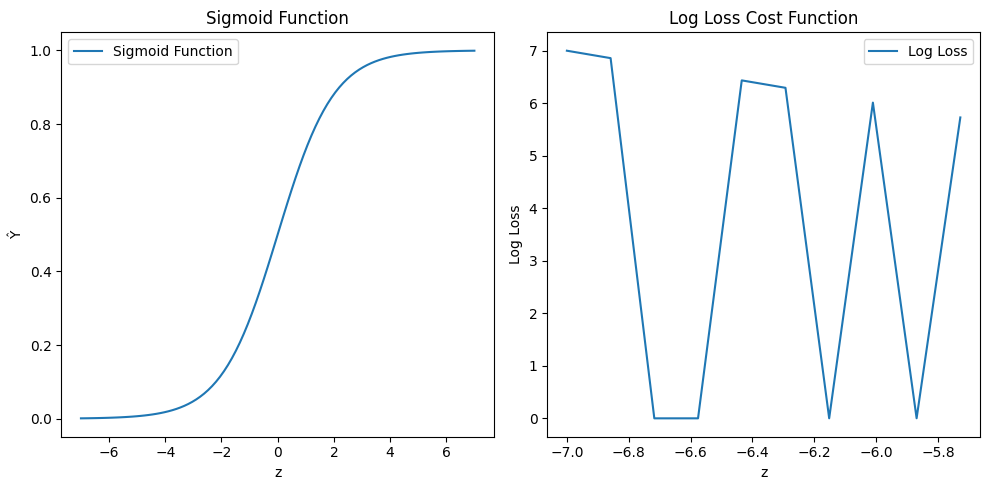

In [15]:
# Define the sigmoid function (logistic function)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the log loss cost function for logistic regression
def log_loss(y_actual, y_predicted):
    epsilon = 1e-15  # Small value to avoid division by zero
    y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)  # Clip values to avoid log(0) and log(1)
    return - (y_actual * np.log(y_predicted) + (1 - y_actual) * np.log(1 - y_predicted)).mean()

# Generate data for visualization
z_values = np.linspace(-7, 7, 100)
sigmoid_values = sigmoid(z_values)

# Visualize the sigmoid function
plt.figure(figsize=(10, 5))

# Plot sigmoid function
plt.subplot(1, 2, 1)
plt.plot(z_values, sigmoid_values, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('Ŷ')
plt.legend()

# Plot log loss cost function
plt.subplot(1, 2, 2)
y_actual = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1])  # Binary ground truth
y_predicted_values = sigmoid_values[:10]  # Use first 10 values for illustration
log_loss_values = [log_loss(y_actual[i], y_pred) for i, y_pred in enumerate(y_predicted_values)]

plt.plot(z_values[:10], log_loss_values, label='Log Loss')
plt.title('Log Loss Cost Function')
plt.xlabel('z')
plt.ylabel('Log Loss')
plt.legend()

plt.tight_layout()
plt.show()



# **How Logistic Regression is Implented?**

**1. Data Preparation:**
  *  Organize data in rows (observations) and columns (features).
  *  Ensure binary target variable (yes/no, true/false, 0/1).

**2. Model Training:**
  *  "Teach" the model using training data.
  *  Adjust model parameters to minimize errors.

**3. Model Evaluation:**
  *  Test the model's performance on unseen data.
  *  Assess accuracy and other metrics.

**4. Prediction:**
  *  Use the trained model to forecast new data outcomes.

## **Using Logistic Regression on the breast_cancer dataset**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.956140350877193
Confusion Matrix:
 [[39  4]
 [ 1 70]]


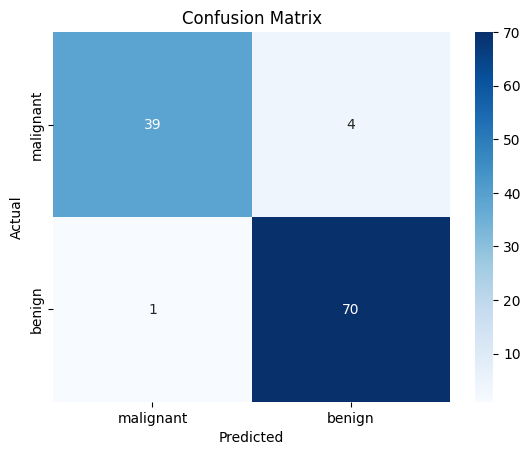

In [17]:
# Load breast cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Split data into training and testing sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train LogisticRegression model
model = LogisticRegression(solver="lbfgs", max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)

# Add labels to the confusion matrix
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")

plt.show()

### **References**

Saini, A. (2024, January 5). A Beginner’s Guide to Logistic Regression. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/
